In [2]:
document = open('MapOfScience.gml', 'r').read()
document = document.split('Version 1.0')[1]
document = document.split('node\n')[1:]
nodes = document[:687]
nodes.append(document[686:][0].split('edge')[0])
final_nodes=[]
for node in nodes:
    node_id = int(node.split('id')[1][:5].split(' ')[1])
    node_name = node.split('name "')[1].split('"')[0]
    node_class = node.split('Class "')[1].split('"')[0]
    node_url = node.split('WikipediaUrl "')[1].split('"')[0]
    final_nodes.append((node_id, {'name':node_name,'class': node_class,'url': node_url }))

#print(final_nodes)
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(final_nodes)
    
edges = document[686:][0].split('edge')[1:]
final_egde = [] 

for edge in edges:
    source = int(edge.split('source')[1][:5].split(' ')[1])
    target = int(edge.split('target')[1][:5].split(' ')[1])
    CosineSimilarity = float(edge.split('CosineSimilarity')[1][:18].split(' ')[1])
    G.add_edge(source, target, weight = CosineSimilarity)

In [3]:

#Centrality

#print(nx.degree_centrality(G))
#print(nx.in_degree_centrality(G))
#print(nx.out_degree_centrality(G))
#print(nx.closeness_centrality(G))
#print(nx.betweenness_centrality(G))
#print(nx.betweenness_centrality_source(G))
#print(nx.edge_betweenness_centrality(G))
#print(nx.voterank(G))

In [4]:

#Approximations and Heuristics

#print(nx.all_pairs_node_connectivity(G)) # this takes a while


In [23]:
#Distance measures

# the graph is not stongly connected do these measures fail
#print(nx.barycenter(G))
#print(nx.center(G))
#print(nx.diameter(G))
#print(nx.eccentricity(G))
#print(nx.periphery(G))


# Eulerian - path in a finite graph that visits every edge exactly once.
print(nx.is_eulerian(G))


False


In [28]:
#Link analysis
#print(nx.pagerank_numpy(G))
#print(nx.hits_numpy(G))

In [31]:
#Matching
#print(nx.maximal_matching(G))
#print(nx.max_weight_matching(G)) #this probably is better for our case because we have the weights

In [35]:
#Reciprocity -> The reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph
print(nx.reciprocity(G))
#being this 0 it means what here?

0.0


In [38]:
print(nx.number_of_isolates(G)) #All pages are at least referenced to or reference another science page! yay!

0


In [51]:
#Clustering
#print(nx.transitivity(G))
#print(nx.clustering(G))
#print(nx.average_clustering(G))
#print(nx.square_clustering(G)) #Compute the squares clustering coefficient for nodes.

In [64]:
#print(nx.constraint(G))

The constraint is a measure of the extent to which a node v is invested in those nodes that are themselves invested in the neighbors of v.

In [66]:
#print(nx.effective_size(G)) #how important is a node given the adjacent nodes connectivity?


The effective size of a node’s ego network is based on the concept of redundancy. A person’s ego network has redundancy to the extent that her contacts are connected to each other as well. The nonredundant part of a person’s relationships it’s the effective size of her ego network 1. 

In [67]:
print(nx.triadic_census(G)) # 

{'003': 49529139, '012': 4118590, '102': 0, '021D': 39781, '021U': 36224, '021C': 45228, '111D': 0, '111U': 0, '030T': 35733, '030C': 0, '201': 0, '120D': 0, '120U': 0, '120C': 0, '210': 0, '300': 0}


The triadic census is a count of how many of the 16 possible types of triads are present in a directed graph.

In [74]:
#The ones taking long

#print(nx.average_shortest_path_length(G)) 
#does not work becaus the graph is not weakly connected

#print(nx.diameter(G))
#print(nx.radius(G))
#does not work becaus the graph is not strongly connected


#XD WTF!? can anyone get a sense in this?

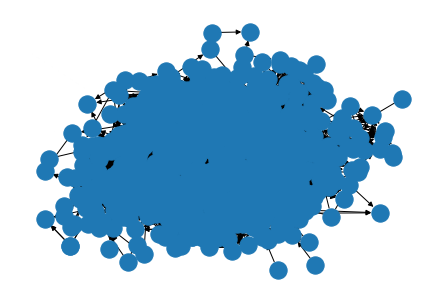

In [70]:
nx.draw_kamada_kawai(G) #amazing....

In [76]:
import pickle
#also lets maybe save this 
with open("MapOfScience_graph", "wb") as f:
        pickle.dump(G, f)

In [78]:
#and then open
#import pickle
import pathlib
PATH = pathlib.Path().absolute()

def main():
    with open(str(PATH) + "\\MapOfScience_graph", "rb") as f:
        G = pickle.load(f)

In [97]:
#print(G.size()) #naa thats weak lets get the info instead
print(nx.info(G))
print(nx.density(G))
print(nx.is_weighted(G)) #this is a weighted graph
print(nx.is_directed(G)) #this is a directed graph
#nx.degree_histogram(G)


Name: 
Type: DiGraph
Number of nodes: 687
Number of edges: 6523
Average in degree:   9.4949
Average out degree:   9.4949
0.013840969950051137
True
True


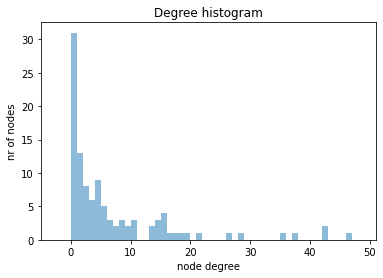

In [89]:
#Lets graph this #powerlaw
import numpy as np
import random
from matplotlib import pyplot as plt

data = nx.degree_histogram(G)

# fixed bin size
bins = np.arange(-100, 100, 1) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Degree histogram')
plt.xlabel('node degree')
plt.ylabel('nr of nodes')

plt.show()